In [66]:
import os
import re
import subprocess

import numpy as np
import networkx as nx

from qiskit import *
from qiskit.visualization import plot_histogram, plot_state_city


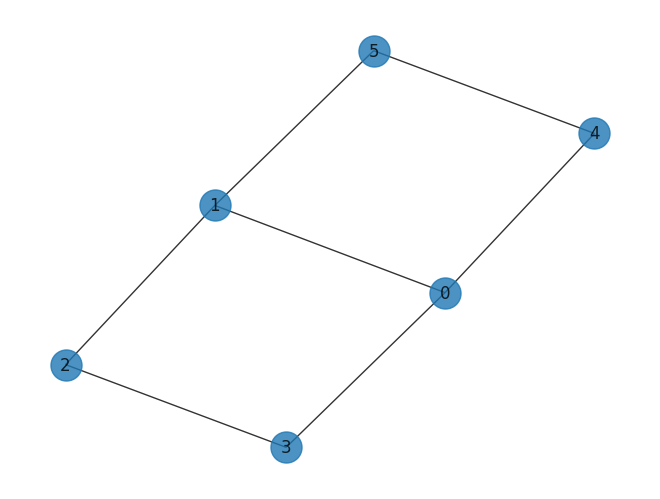

In [68]:
G6 = nx.Graph()
G6.add_nodes_from([0, 1, 2, 3, 4, 5])
G6.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (0, 4), (5,1)])
nx.draw(G6, with_labels=True, alpha=0.8, node_size=500)

In [64]:

bashCommand = "silq --run ./QAOA.slq"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

state_sr = output.decode("utf-8", "strict")
print(state_sr)

(-0.0784455+0.112365i)·|(0,1,0,1,0,1)⟩+(-0.163149+0.113218i)·|(0,1,0,1,0,0)⟩+(-0.0384571+0.0507702i)·|(0,1,0,1,1,1)⟩+(-0.0101306+0.0193369i)·|(0,1,1,1,0,1)⟩+(-0.179859+0.152765i)·|(0,1,0,1,1,0)⟩+(-0.0286247+0.0436512i)·|(0,1,1,1,0,0)⟩+(-0.0120829+0.00363031i)·|(0,1,1,1,1,1)⟩+(-0.143882+0.0116318i)·|(0,0,0,0,0,1)⟩+(-0.0325361+0.0708365i)·|(1,1,0,0,0,1)⟩+(-0.131671+0.103892i)·|(1,0,0,1,0,1)⟩+(-0.0384571+0.0507702i)·|(0,1,1,1,1,0)⟩+(-0.110928-0.0439731i)·|(0,0,0,0,0,0)⟩+(-0.104489+0.117564i)·|(1,1,0,0,0,0)⟩+(-0.119244+0.0733133i)·|(1,0,0,1,0,0)⟩+(-0.0874955+0.0496613i)·|(0,0,0,0,1,1)⟩+(-0.00974679-0.000593323i)·|(1,1,0,0,1,1)⟩+(-0.030342+0.0248298i)·|(1,0,0,1,1,1)⟩+(-0.162005+0.0715952i)·|(0,0,1,0,0,1)⟩+(0.00248332+0.00579133i)·|(1,1,1,0,0,1)⟩+(-0.065287+0.0486896i)·|(1,0,1,1,0,1)⟩+(-0.0219079+0.00775828i)·|(1,0,1,1,1,1)⟩+(-0.0112482-0.0149791i)·|(1,1,1,0,1,1)⟩+(-0.0963711+0.0887546i)·|(0,0,1,0,1,1)⟩+(-0.155904+0.0139228i)·|(0,0,0,0,1,0)⟩+(-0.044558+0.0731275i)·|(1,1,0,0,1,0)⟩+(-0.055906+

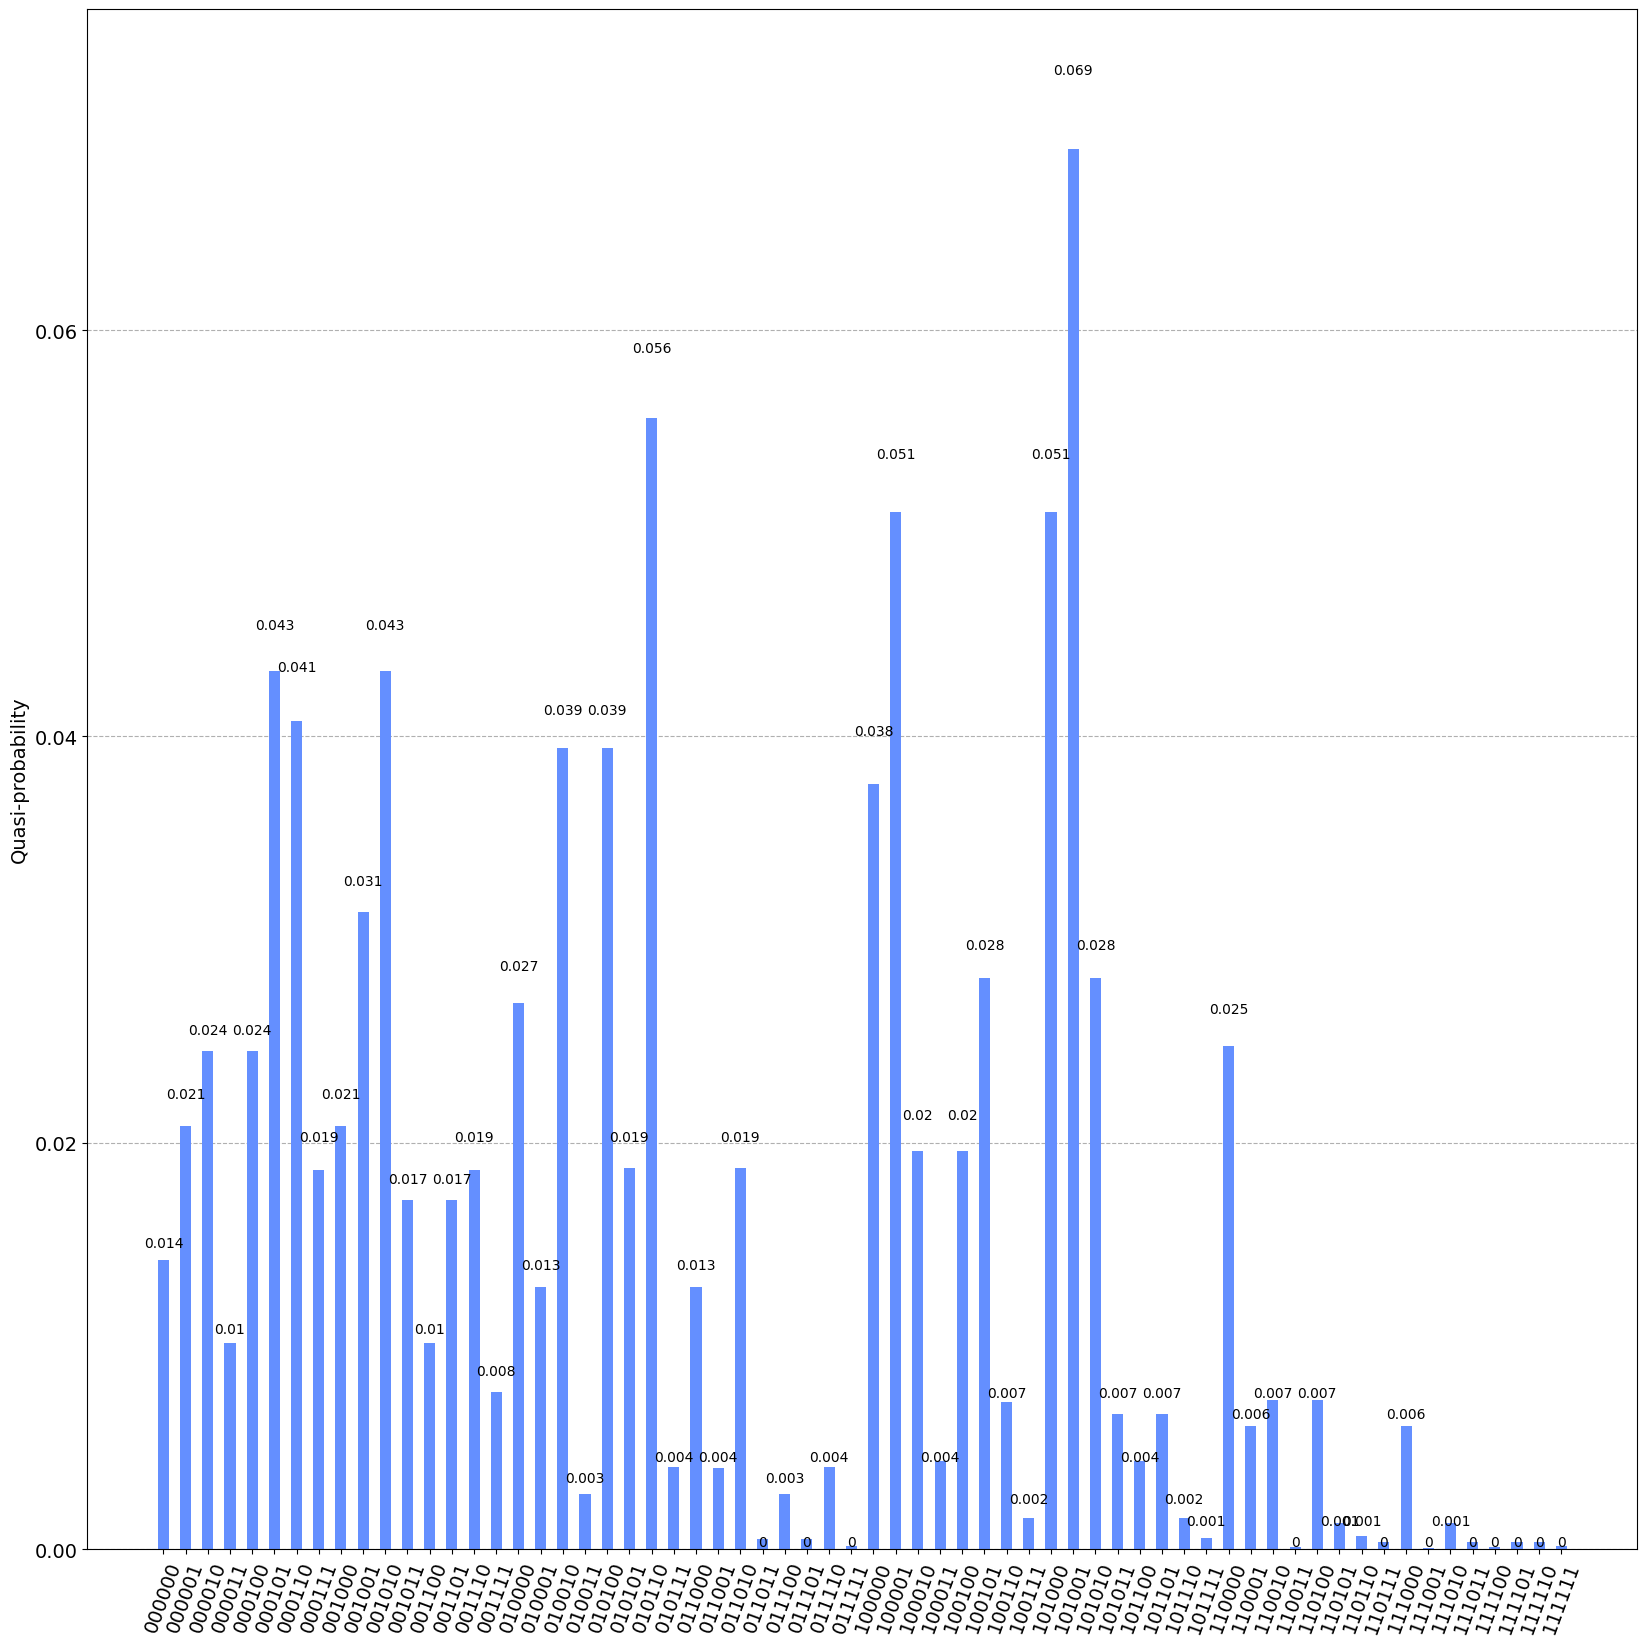

In [65]:
state_regex = re.compile(r'((?<=\().+?(?=\)))')
state_matches = re.findall(state_regex, state_sr)

state_dict = {}
for i in range(0, len(state_matches), 2):
    state_amp = complex(state_matches[i].replace('i', 'j'))
    state = state_matches[i+1].replace(',', '')
    state_dict[state] = np.abs(state_amp * state_amp.conjugate())

plot_histogram(state_dict, figsize=(20,20))
